Importing modules

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from get_recensement import get_recensement

# Importation du recensement de 1832

In [125]:
df = get_recensement()

Defining the vocation categories and some colors into `vocation_categories`. Then we are storing informations in a potentially useful way in `df_`.

In [126]:
vocation_categories = [
    ("rente", (0, 1, 1)),
    ("administration", (0.2, 0.2, 1)),
    ("service", (0.3, 0.3, 1)),
    ("commerce", (0.4, 0.4, 1)),
    ("artisanat", (1, 0, 0)),
    ("construction", (1, 0.5, 0)),
    ("agricole", (0.5, 0.8, 0.5)),
]
data = {
    "Division": [],
    "rente": [],
    "administration": [],
    "service": [],
    "commerce": [],
    "artisanat": [],
    "construction": [],
    "agricole": [],
}
divisions = df["Division"].unique()
for division in divisions:
    data["Division"].append(division)
    for vocation_categorie in data.keys():
        if vocation_categorie == "Division": continue
        data[vocation_categorie].append(len(df.query("Division == @division and chef_vocation_categorie == @vocation_categorie")))
        
df_ = pd.DataFrame(data)
df_["Division"] = df_["Division"].astype(str)
df_ = df_.sort_values(by="Division").reset_index(drop=True)

# Distribution des classes de métiers par division (1/2)

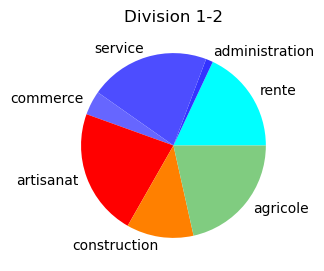

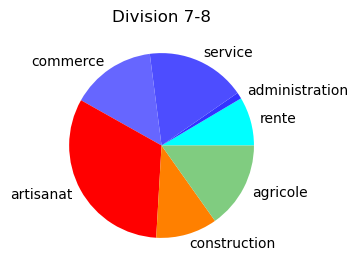

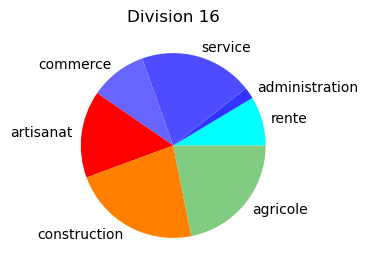

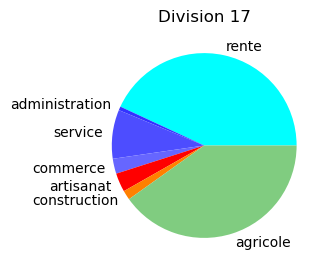

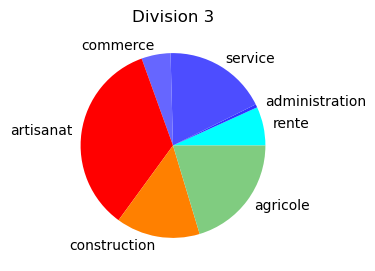

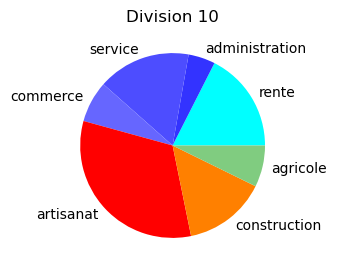

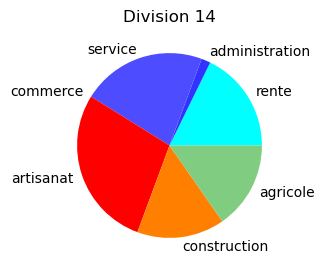

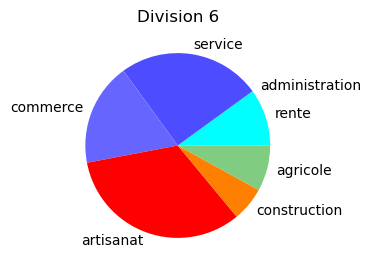

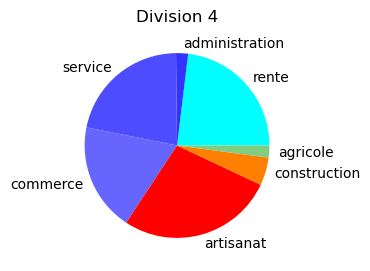

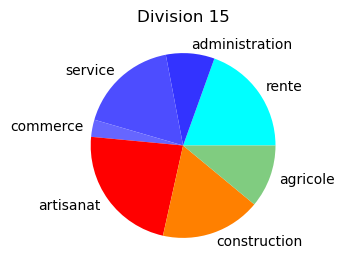

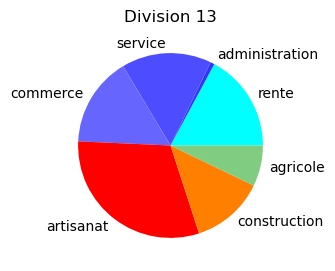

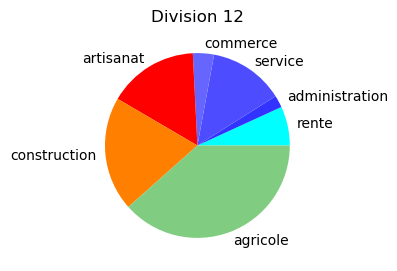

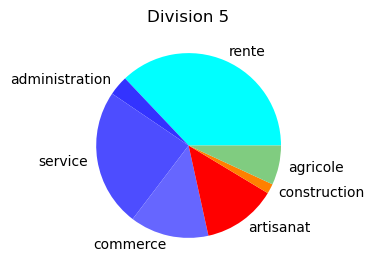

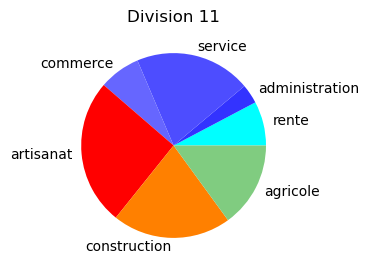

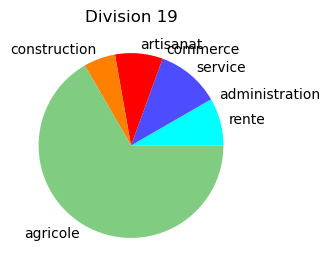

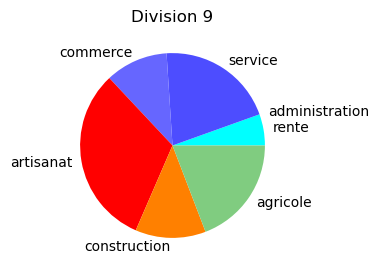

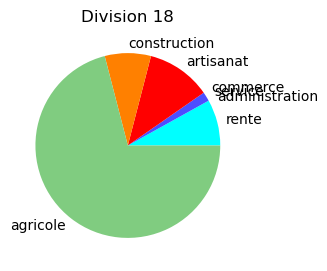

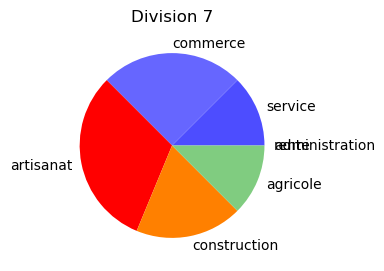

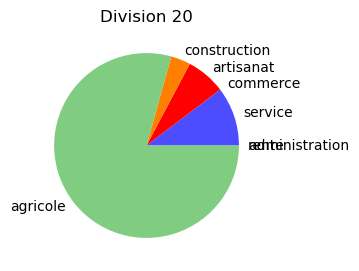

In [127]:
for division in divisions:
    # make pie chart
    counts = []
    for categorie, _ in vocation_categories:
        counts.append(len(df.query(f"Division == @division & chef_vocation_categorie == @categorie")))
    if np.sum(counts) == 0: continue
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f"Division {division}")
    plt.pie(counts, labels=[categorie for categorie, _ in vocation_categories], colors=[color for _, color in vocation_categories])
    # plt.legend(loc="left")

# Distribution des classes de métiers par division (2/2)

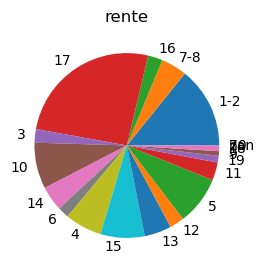

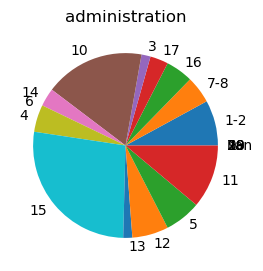

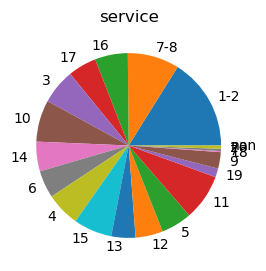

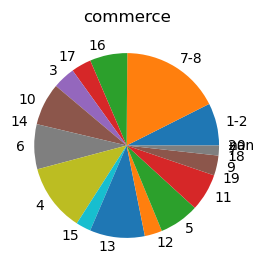

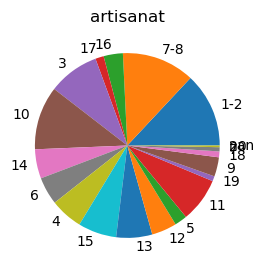

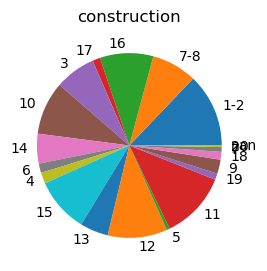

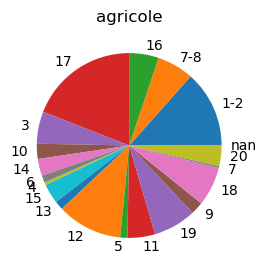

In [128]:
for categorie, _ in vocation_categories:
    # make pie chart
    counts = []
    for division in divisions:
        counts.append(len(df.query(f"Division == @division & chef_vocation_categorie == @categorie")))
    if np.sum(counts) == 0: continue
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(f"{categorie}")
    plt.pie(counts, labels=[division for division in divisions])
    # plt.legend(loc="left")

# Rues majeures de chaque division

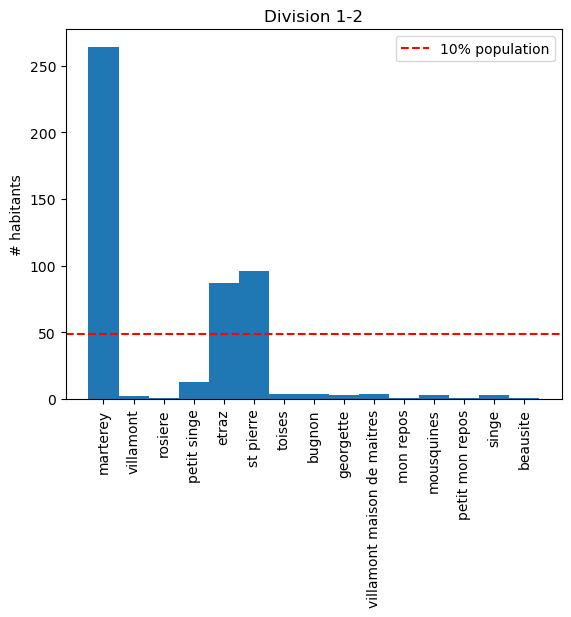

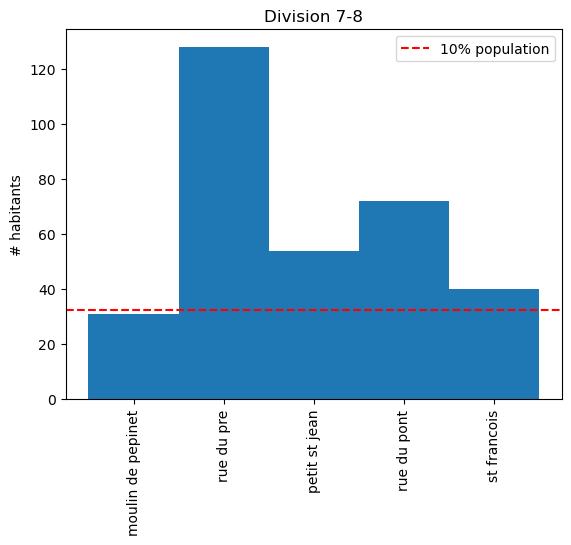

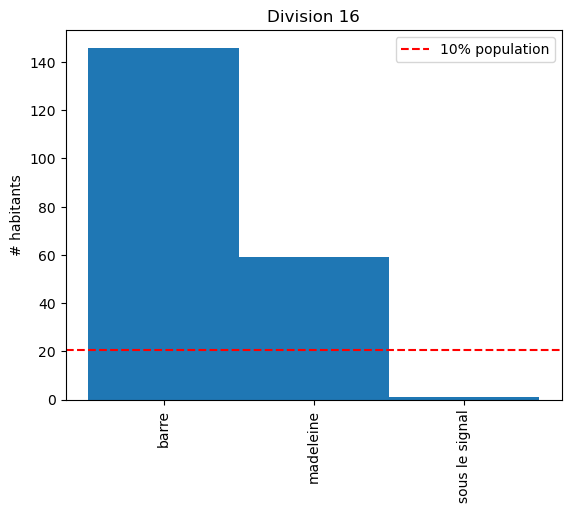

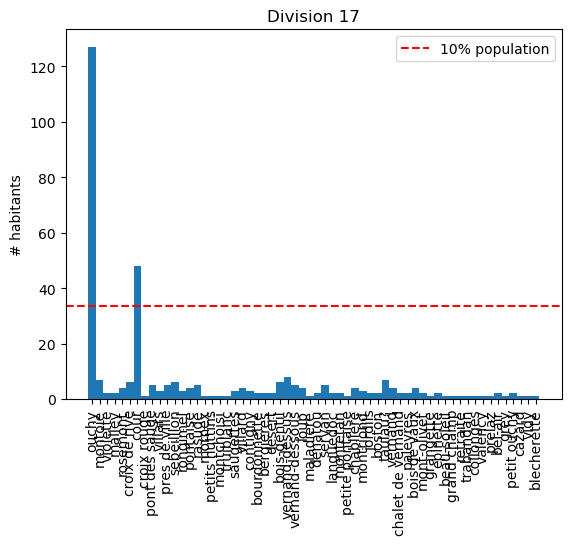

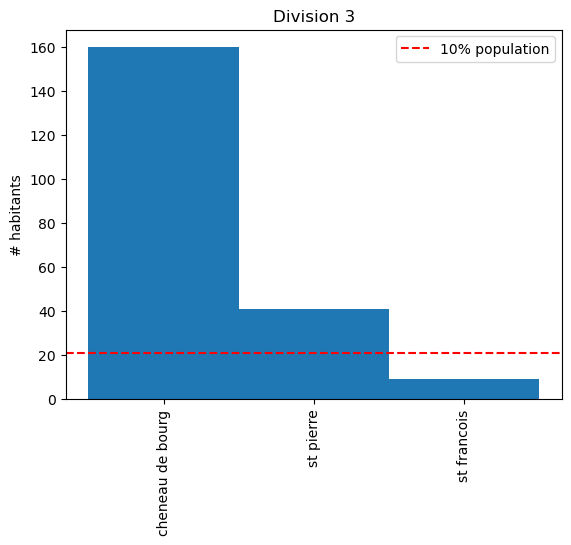

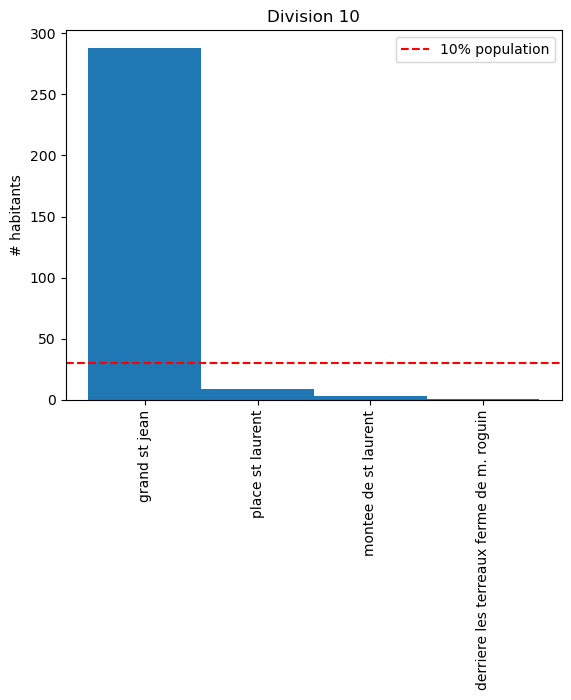

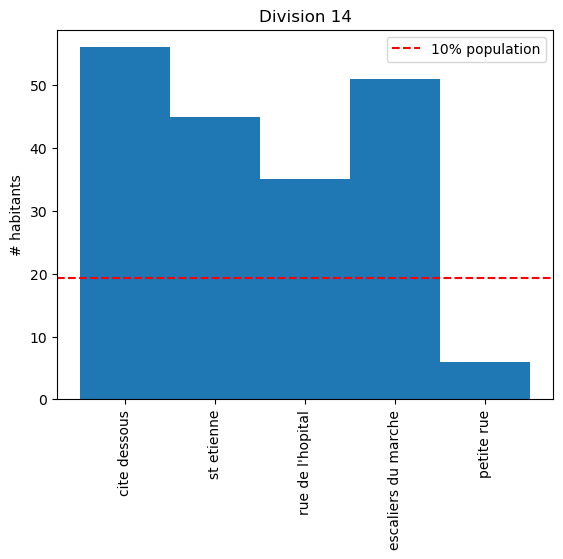

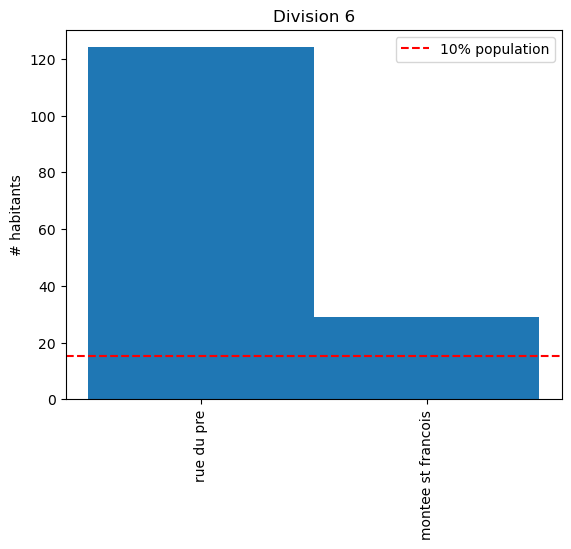

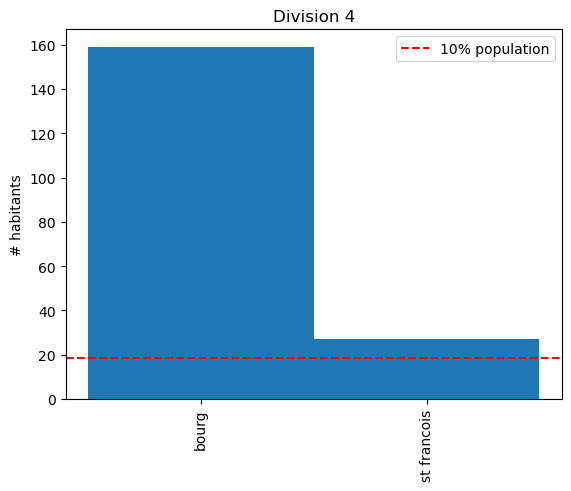

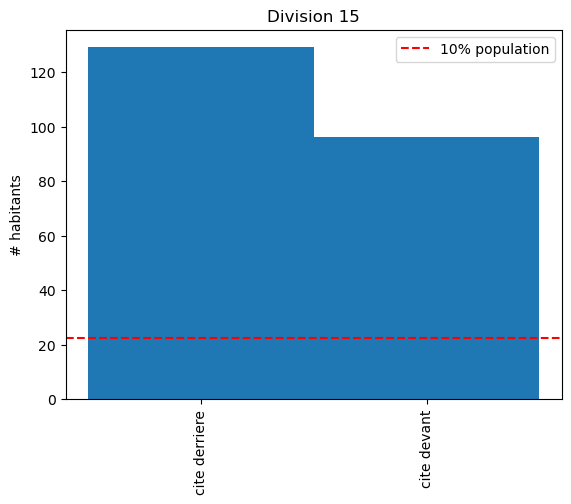

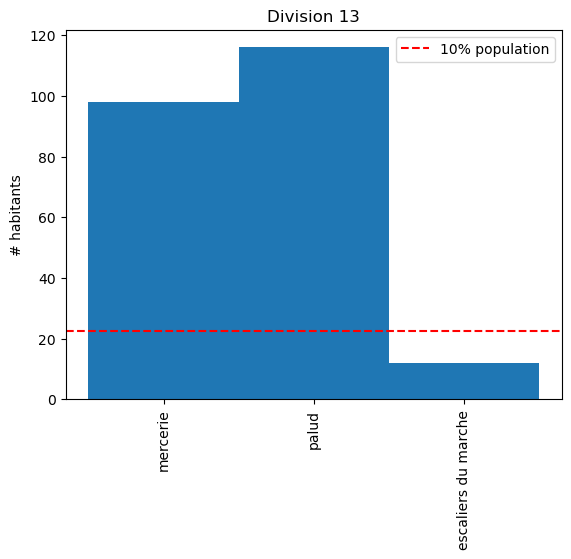

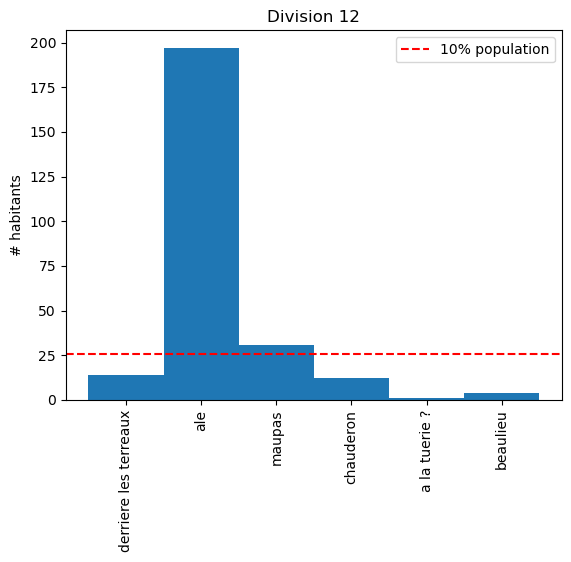

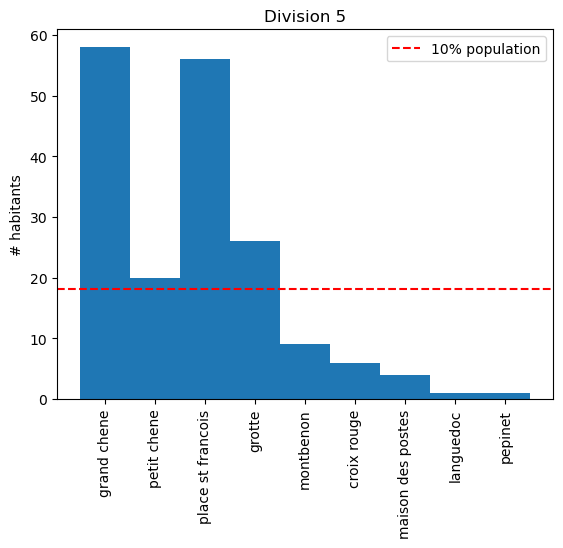

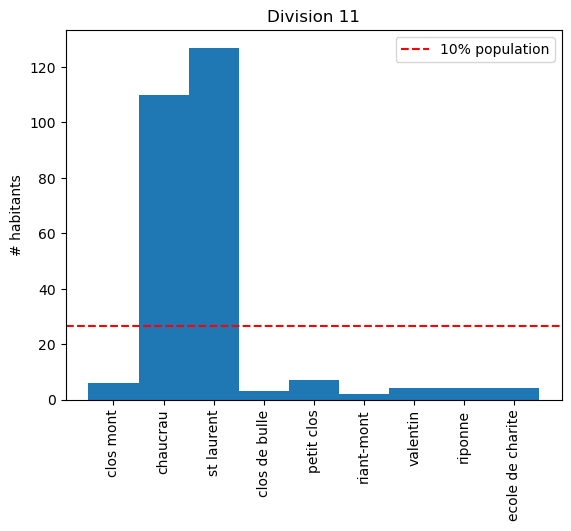

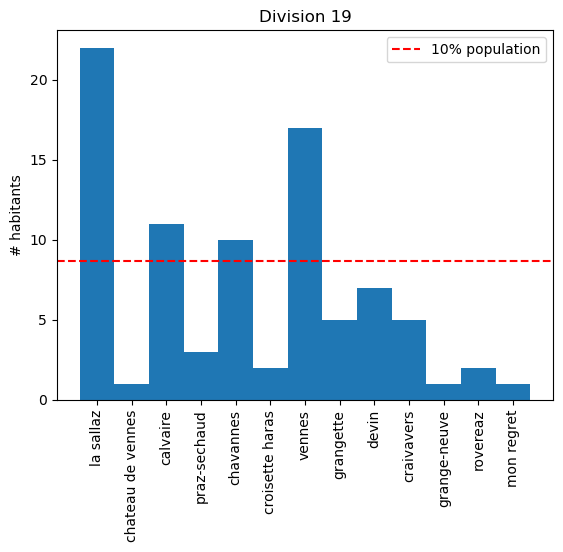

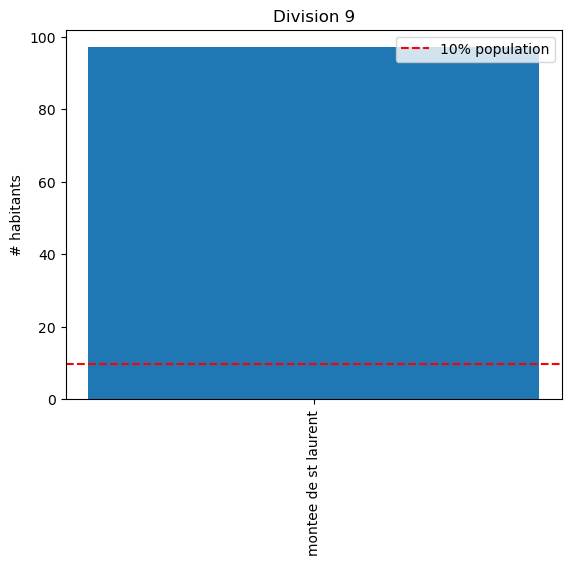

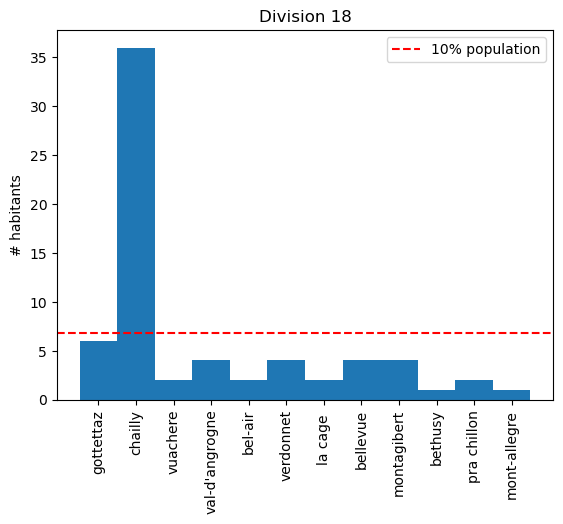

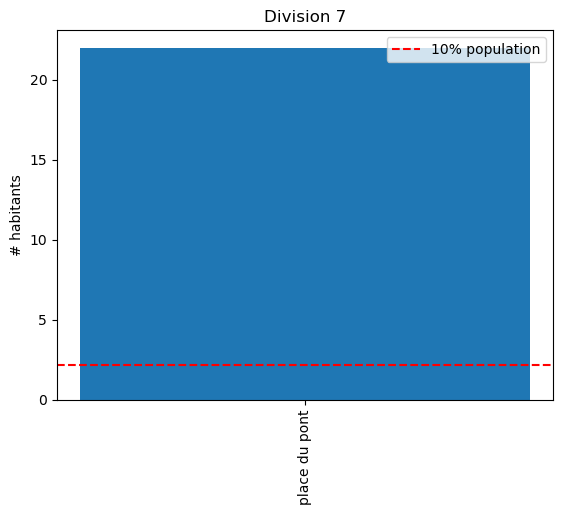

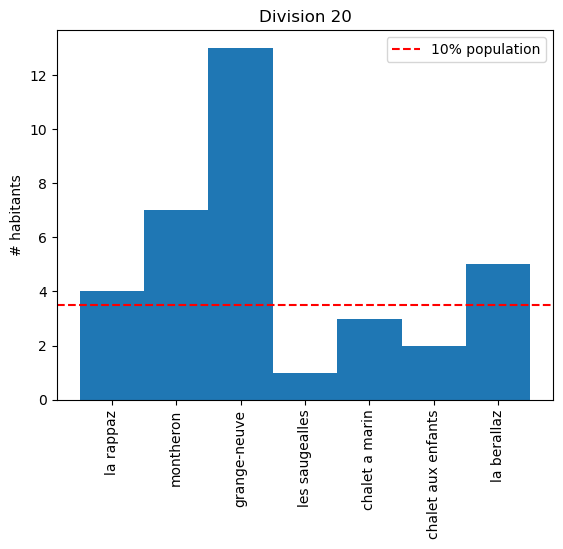

In [51]:
for division in divisions:
    # print(f"Division {division}")
    df_ = df.query("Division==@division")
    if len(df_) == 0: continue
    rues = df_["nom_rue_norm_2"].values
    plt.figure()
    plt.title(f"Division {division}")
    plt.hist(rues, bins=np.arange(start=-0.5, stop=len(np.unique(rues))-0.5+1, step=1))
    plt.axhline(y=len(rues)*0.1, color="red", linestyle="--", label="10% population")
    plt.xticks(rotation=90)
    plt.ylabel("# habitants")
    plt.legend()
    # for rue in np.unique(rues):
        # print(f"{rue} {sum(rues==rue)}")
    # print("")

# Distribution des âges par division

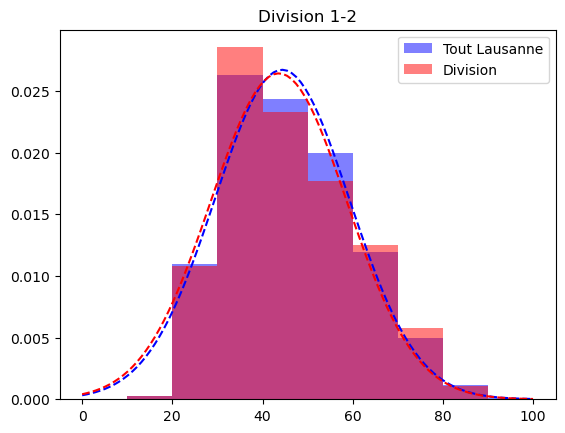

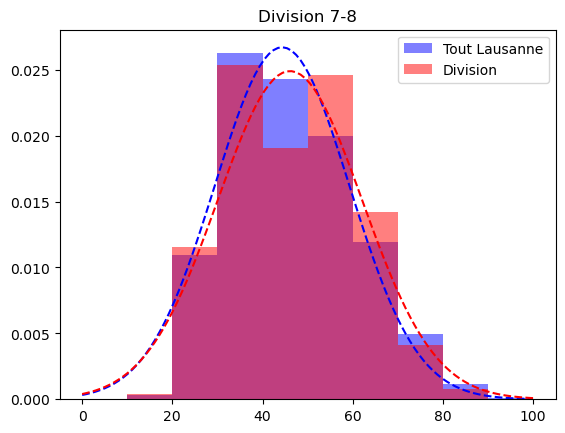

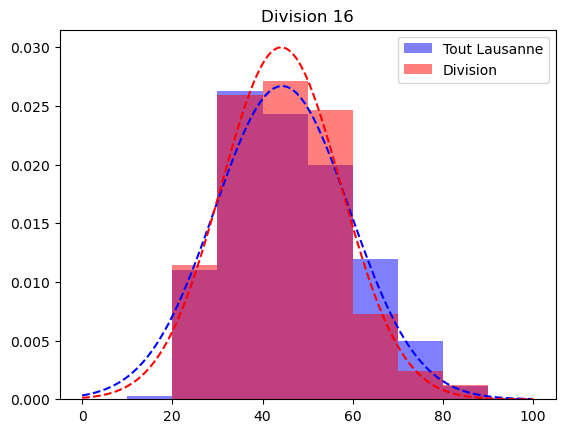

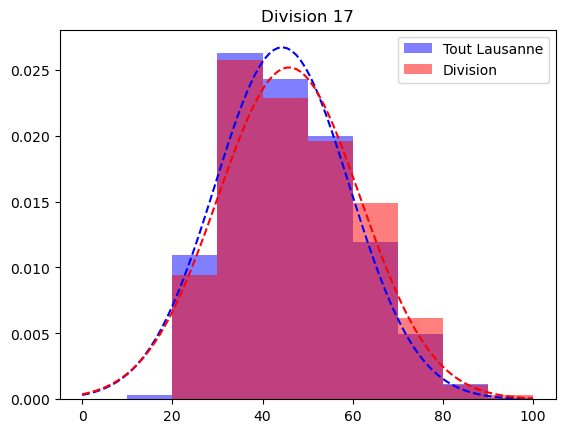

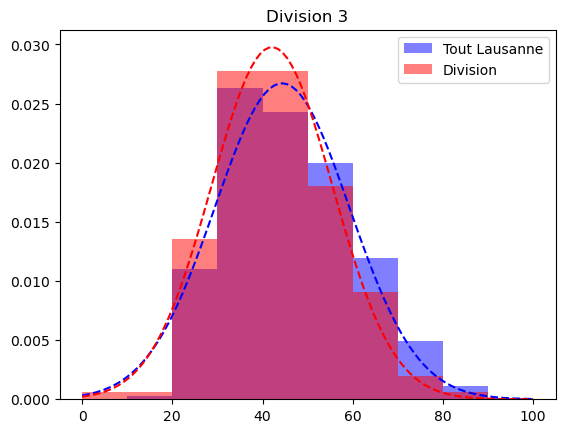

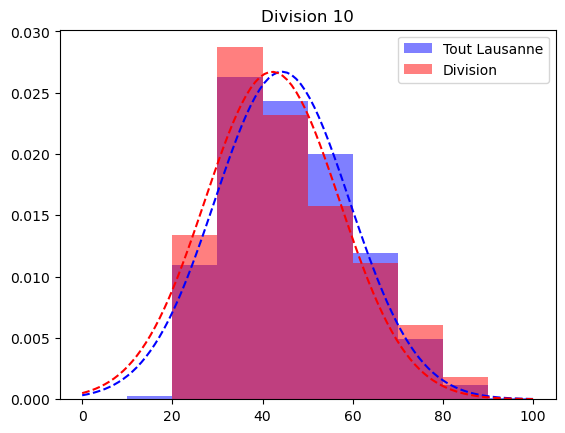

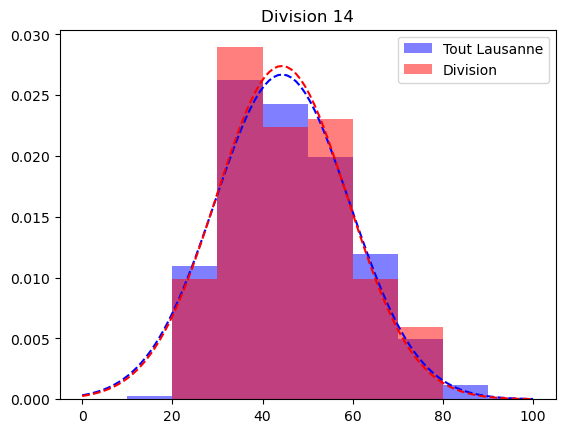

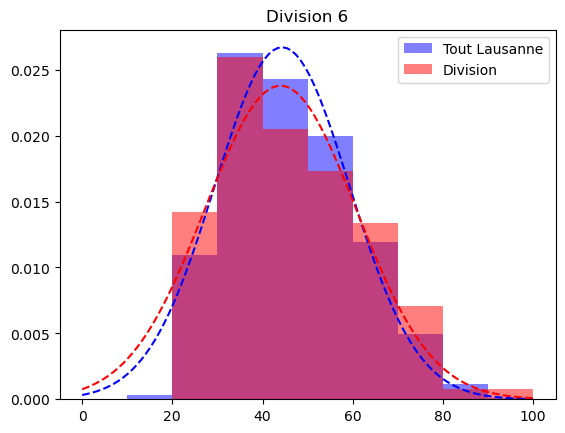

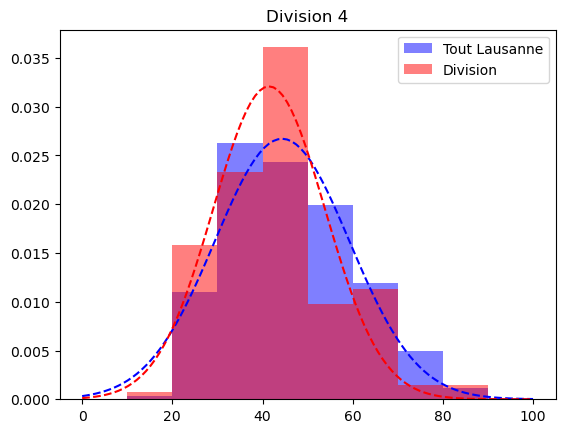

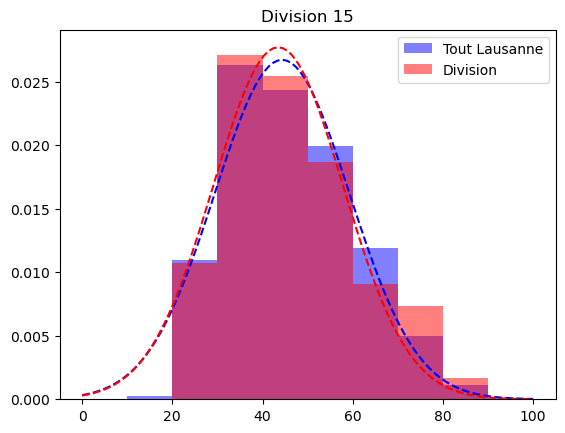

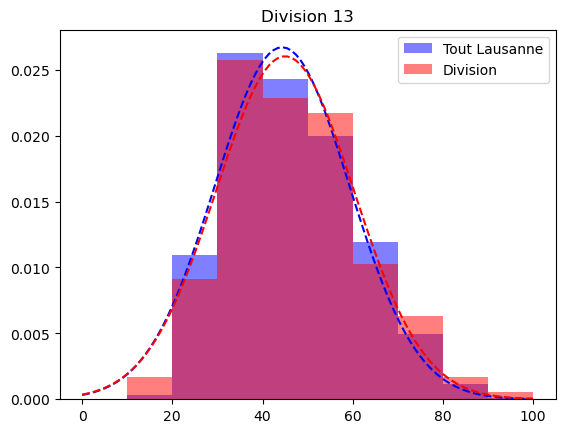

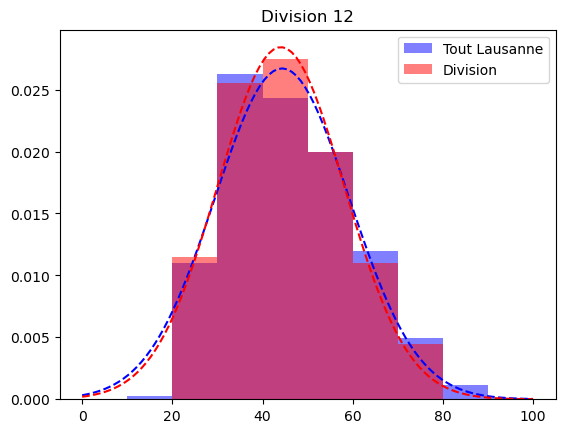

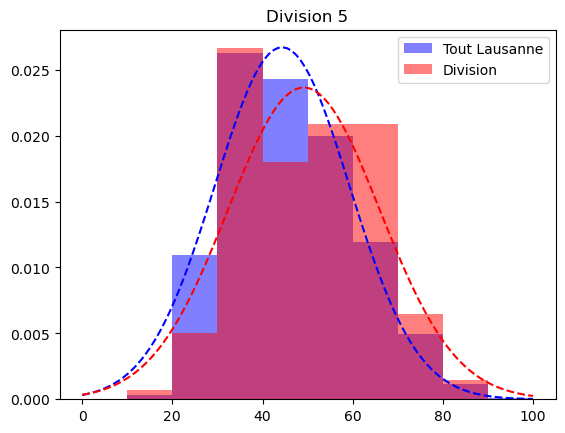

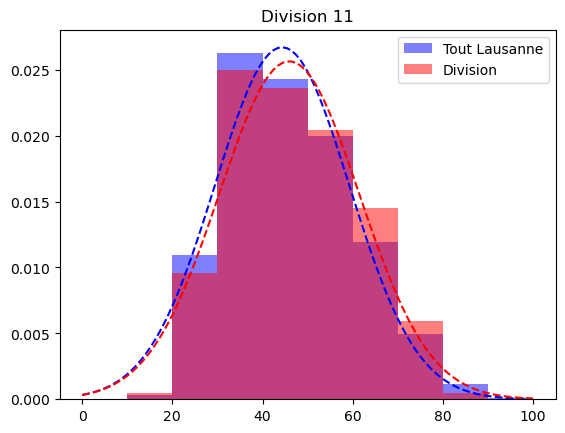

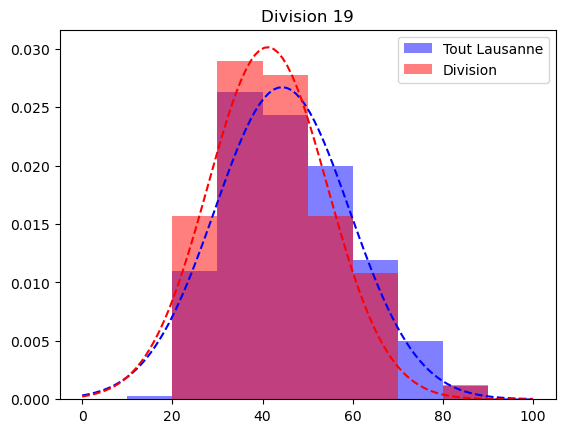

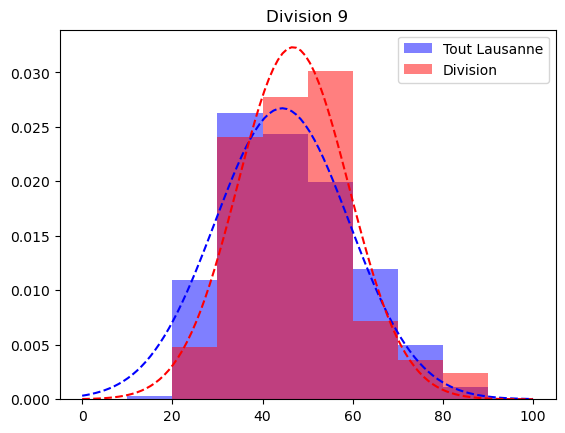

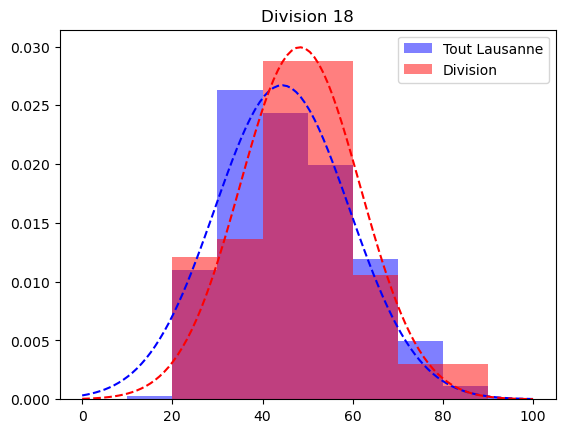

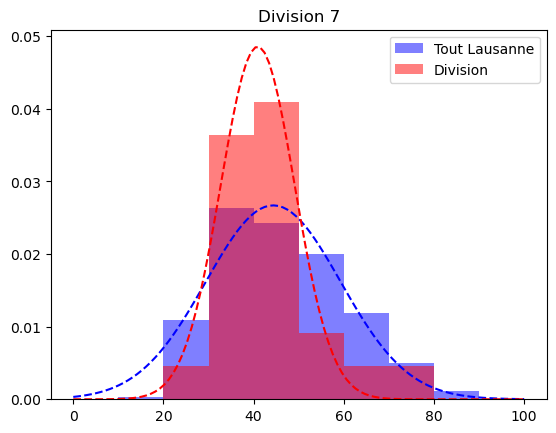

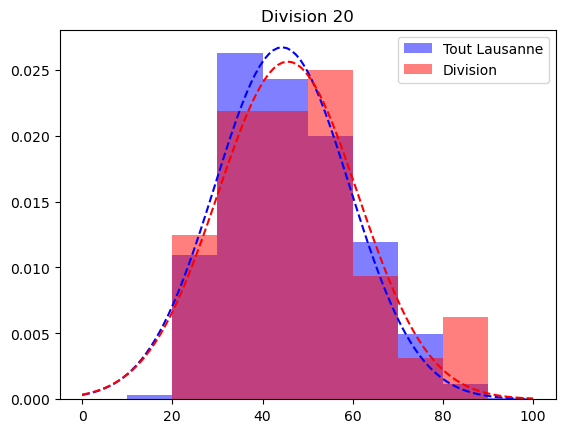

In [124]:
def gaussian(x: float, loc: float, scale: float) -> float:
    return 1 / (scale * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - loc) / scale) ** 2)

annee_naissances = df["chef_annee_naissance"].values
ages_global = []
for annee_naissance in annee_naissances:
    try:
        ages_global.append(1832 - int(annee_naissance))
    except:
        continue

for division in divisions:
    if division is np.nan: continue
    df_ = df.query(f"Division == @division")
    annee_naissances = df_["chef_annee_naissance"].values
    ages = []
    for annee_naissance in annee_naissances:
        try:
            ages.append(1832 - int(annee_naissance))
        except:
            continue
    
    # make histogram
    bin_step = 10
    plt.figure()
    plt.title(f"Division {division}")
    y, x, _ = plt.hist(ages_global, bins=np.arange(start=0, stop=100+1, step=bin_step), color=(0, 0, 1, 0.5), density=True, label="Tout Lausanne")
    popt, _ = curve_fit(gaussian, 0.5 * (x[1:] + x[:-1]), y, p0=[50, 10])
    X = np.linspace(0, 100, 100)
    plt.plot(X, gaussian(X, *popt), color="b", linestyle="--")
    y, x, _ = plt.hist(ages, bins=np.arange(start=0, stop=100+1, step=bin_step), density=True, color=(1, 0, 0, 0.5), label="Division")
    popt, _ = curve_fit(gaussian, 0.5 * (x[1:] + x[:-1]), y, p0=[50, 10])
    X = np.linspace(0, 100, 100)
    plt.plot(X, gaussian(X, *popt), color="r", linestyle="--")
    plt.legend()


True

In [115]:
type(np.nan)

float